In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In questo notebook vengono analizzate le simulazioni caratterizzate da parametro:
$$\alpha\,=\,1\cdot 10^{-4}$$

In [2]:
massr = np.array(['0.1', '0.33', '0.5', '1', '2', '3', '10'])
par_rag = 0.999

<center>

# <span style="color:blue;">Eccentricità: e = 0 </span>

<center>

### Output finali

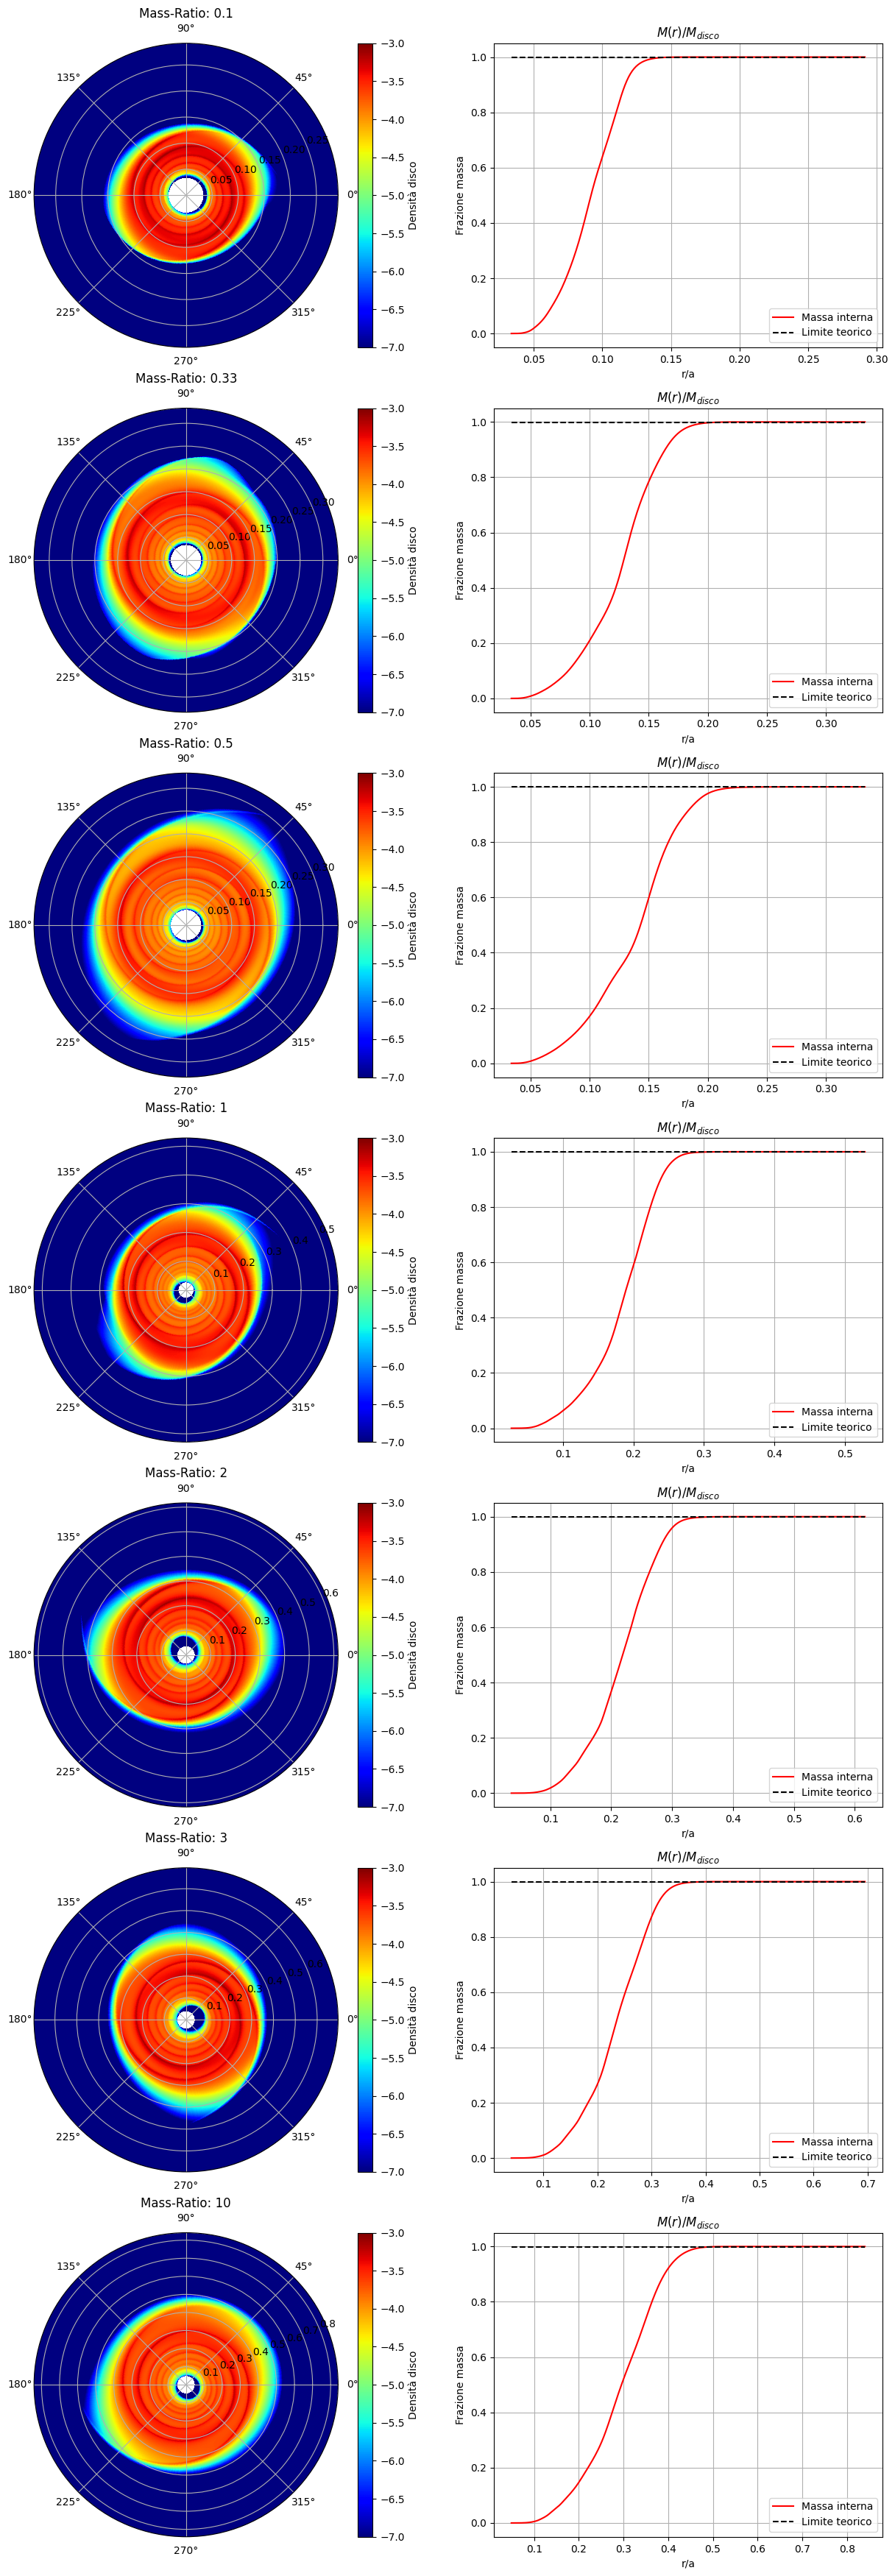

In [3]:
dim = np.array([3.5, 4.0, 4.0, 8.0, 7.0, 7.0, 7.0])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])


# Creare una figura con più grafici polari
fig = plt.figure(figsize=(15, 44))
#Contenitore per la massa progressiva
m_prog = np.zeros((7, 384))

for i in range(0, 7):

    #Valori assunti dalla densità
    rho = np.fromfile("../Alpha-4/NoEcc/MR"+massr[i]+"/gasdens100.dat").reshape(384, 1152)

    for j in range(0, 2):

        #----------------------------------#
        #          Creo la griglia          #
        #-----------------------------------#

        # Creare una griglia di valori R e Theta
        theta = np.linspace(-np.pi, np.pi, 1152)
        #Creo coordinata radiale corretta
        r = np.linspace(0.4/dist[i], dim[i]/dist[i], 385)
        r_plot = np.zeros(384)
        for k in range(0, len(r_plot)):
            r_plot[k] = (r[k+1] - r[k])/2 + r[k]
        #Creo la griglia
        Theta, R = np.meshgrid(theta, r_plot)

        if (2*i + j)%2 == 0:
            ax = fig.add_subplot(7, 2, 2*i + j+1, projection='polar')
            #-----------------------------------#
            #      Disegno grafico polare       #
            #-----------------------------------#

            #Disegnare il grafico polare
            cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
            plt.colorbar(cax, label='Densità disco')
            ax.set_rmin(0)
            ax.set_rmax(dim[i]/dist[i])
            ax.set_title(f'Mass-Ratio: ' + (massr[i]))

        else:
            ax = fig.add_subplot(7, 2, 2*i + j+1)
            raggio = 0

            #---------------------------------#
            #        Calcolo la massa         #
            #---------------------------------#
            for k in range(0,384):
                if k != 0:
                    m_prog[i, k] = m_prog[i, k-1]
                #Calcolo area della singola sezione
                area = np.pi * (pow(r[k+1],2)-pow(r[k],2))
                area = area/1152

                for h in range(0, 1152):
                    m_prog[i, k] += area * rho[k, h]
            
            ax.plot(r_plot, m_prog[i]/m_prog[i, 383], color = 'red', label = 'Massa interna')
            ax.plot(r_plot, m_prog[i]/m_prog[i] * 0.999, color = 'black', linestyle = '--', label = 'Limite teorico')
            ax.set_title(r'$M\left(r\right)/M_{disco}$')
            ax.set_xlabel(r'r/a')
            ax.set_ylabel('Frazione massa')
            ax.legend(loc='best')
            ax.grid(True)
    
    

# Mostrare la figura con i grafici polari multipli
plt.show()

### Raggi

In [4]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
dim = np.array([3.5, 4.0, 4.0, 8.0, 7.0, 7.0, 7.0])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
rag_A4_e0 = np.zeros(7)


for h in range(0, 7):
    rag = np.zeros(num[h])

    #Determino i raggi corretti
    r = np.linspace(0.4, dim[h], 385)
    r_plot = np.zeros(384)
    for i in range(0, len(r_plot)):
        r_plot[i] = (r[i+1] - r[i])/2 + r[i]

    for k in range(0, num[h]):
        #Importo la densità considerata
        rho = np.fromfile("../Alpha-4/NoEcc/MR"+massr[h]+"/gasdens" + str(60+k) + ".dat").reshape(384, 1152)
        massa = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                massa += area * rho[i, j]

        #Controllo ora dove ottengo il 90% della massa
        appo = 0
        raggio = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                appo += area * rho[i, j]
    
            if appo >= par_rag*massa:
                rag[k] = r_plot[i]
                break

    med = 0
    for i in range(0, len(rag)):
        med += rag[i]

    rag_A4_e0[h] = round(med/len(rag)/dist[h], 3)
    print('Il raggio di troncamento del disco con Mass-ratio =  ' + massr[h] + ' è pari a: ' + str(round(med/len(rag)/dist[h], 3)) + ' a')

Il raggio di troncamento del disco con Mass-ratio =  0.1 è pari a: 0.147 a
Il raggio di troncamento del disco con Mass-ratio =  0.33 è pari a: 0.212 a
Il raggio di troncamento del disco con Mass-ratio =  0.5 è pari a: 0.239 a
Il raggio di troncamento del disco con Mass-ratio =  1 è pari a: 0.3 a
Il raggio di troncamento del disco con Mass-ratio =  2 è pari a: 0.357 a
Il raggio di troncamento del disco con Mass-ratio =  3 è pari a: 0.394 a
Il raggio di troncamento del disco con Mass-ratio =  10 è pari a: 0.501 a


<center>

# <span style="color:blue;">Eccentricità: e = 0.3 </span>

<center>

### Output finali

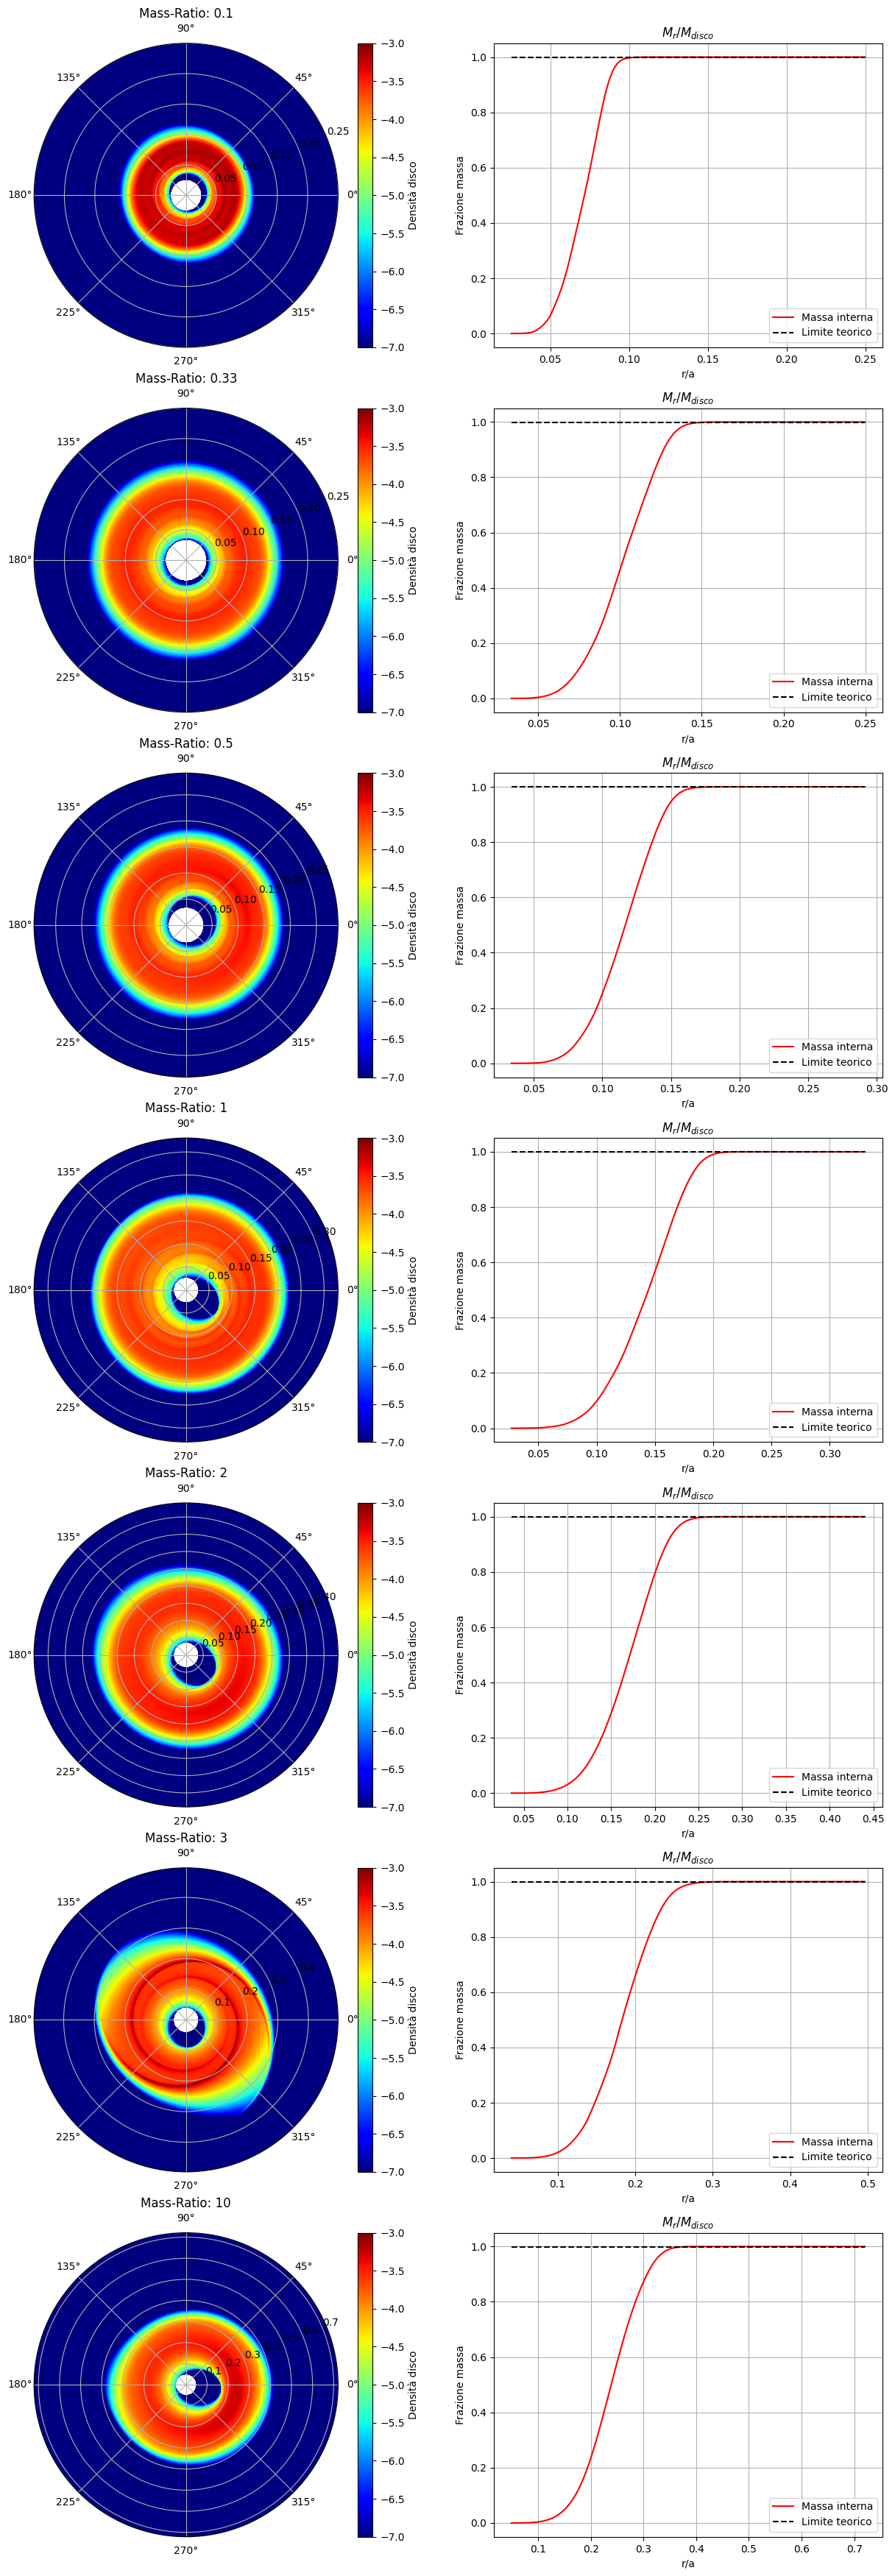

In [5]:
rmax = np.array([3.0, 3.0, 3.5, 5.0, 5.0, 5.0, 6.0])
rmin = np.array([0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])


# Creare una figura con più grafici polari
fig = plt.figure(figsize=(15, 44))
#Contenitore per la massa progressiva
m_prog = np.zeros((7, 384))

for i in range(0, 7):

    #Valori assunti dalla densità
    rho = np.fromfile("../Alpha-4/MedEcc/MR"+massr[i]+"/gasdens100.dat").reshape(384, 1152)

    for j in range(0, 2):

        #----------------------------------#
        #          Creo la griglia          #
        #-----------------------------------#

        # Creare una griglia di valori R e Theta
        theta = np.linspace(-np.pi, np.pi, 1152)
        #Creo coordinata radiale corretta
        r = np.linspace(rmin[i]/dist[i], rmax[i]/dist[i], 385)
        r_plot = np.zeros(384)
        for k in range(0, len(r_plot)):
            r_plot[k] = (r[k+1] - r[k])/2 + r[k]
        #Creo la griglia
        Theta, R = np.meshgrid(theta, r_plot)

        if (2*i + j)%2 == 0:
            ax = fig.add_subplot(7, 2, 2*i + j+1, projection='polar')
            #-----------------------------------#
            #      Disegno grafico polare       #
            #-----------------------------------#

            #Disegnare il grafico polare
            cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
            plt.colorbar(cax, label='Densità disco')
            ax.set_rmin(0)
            ax.set_rmax(rmax[i]/dist[i])
            ax.set_title(f'Mass-Ratio: ' + (massr[i]))

        else:
            ax = fig.add_subplot(7, 2, 2*i + j+1)
            raggio = 0

            #---------------------------------#
            #        Calcolo la massa         #
            #---------------------------------#
            for k in range(0,384):
                if k != 0:
                    m_prog[i, k] = m_prog[i, k-1]
                #Calcolo area della singola sezione
                area = np.pi * (pow(r[k+1],2)-pow(r[k],2))
                area = area/1152

                for h in range(0, 1152):
                    m_prog[i, k] += area * rho[k, h]
            
            ax.plot(r_plot, m_prog[i]/m_prog[i, 383], color = 'red', label = 'Massa interna')
            ax.plot(r_plot, m_prog[i]/m_prog[i] * 0.999, color = 'black', linestyle = '--', label = 'Limite teorico')
            ax.set_title(r'$M_r/M_{disco}$')
            ax.set_xlabel(r'r/a')
            ax.set_ylabel('Frazione massa')
            ax.legend(loc='best')
            ax.grid(True)
    
    

# Mostrare la figura con i grafici polari multipli
plt.show()

### Raggi

In [6]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([3.0, 3.0, 3.5, 5.0, 5.0, 5.0, 6.0])
rmin = np.array([0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
rag_A4_e3 = np.zeros(7)


for h in range(0, 7):
    rag = np.zeros(num[h])

    #Determino i raggi corretti
    r = np.linspace(rmin[h], rmax[h], 385)
    r_plot = np.zeros(384)
    for i in range(0, len(r_plot)):
        r_plot[i] = (r[i+1] - r[i])/2 + r[i]

    for k in range(0, num[h]):
        #Importo la densità considerata
        rho = np.fromfile("../Alpha-4/MedEcc/MR"+massr[h]+"/gasdens" + str(60+k) + ".dat").reshape(384, 1152)
        massa = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                massa += area * rho[i, j]

        #Controllo ora dove ottengo il 90% della massa
        appo = 0
        raggio = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                appo += area * rho[i, j]
    
            if appo >= par_rag*massa:
                rag[k] = r_plot[i]
                break

    med = 0
    for i in range(0, len(rag)):
        med += rag[i]

    rag_A4_e3[h] = round(med/len(rag)/dist[h], 3)
    print('Il raggio di troncamento del disco con Mass-ratio =  ' + massr[h] + ' è pari a: ' + str(round(med/len(rag)/dist[h], 3)) + ' a')

Il raggio di troncamento del disco con Mass-ratio =  0.1 è pari a: 0.105 a
Il raggio di troncamento del disco con Mass-ratio =  0.33 è pari a: 0.16 a
Il raggio di troncamento del disco con Mass-ratio =  0.5 è pari a: 0.179 a
Il raggio di troncamento del disco con Mass-ratio =  1 è pari a: 0.222 a
Il raggio di troncamento del disco con Mass-ratio =  2 è pari a: 0.262 a
Il raggio di troncamento del disco con Mass-ratio =  3 è pari a: 0.291 a
Il raggio di troncamento del disco con Mass-ratio =  10 è pari a: 0.374 a


<center>

# <span style="color:blue;">Eccentricità: e = 0.6 </span>

<center>

### Output finali

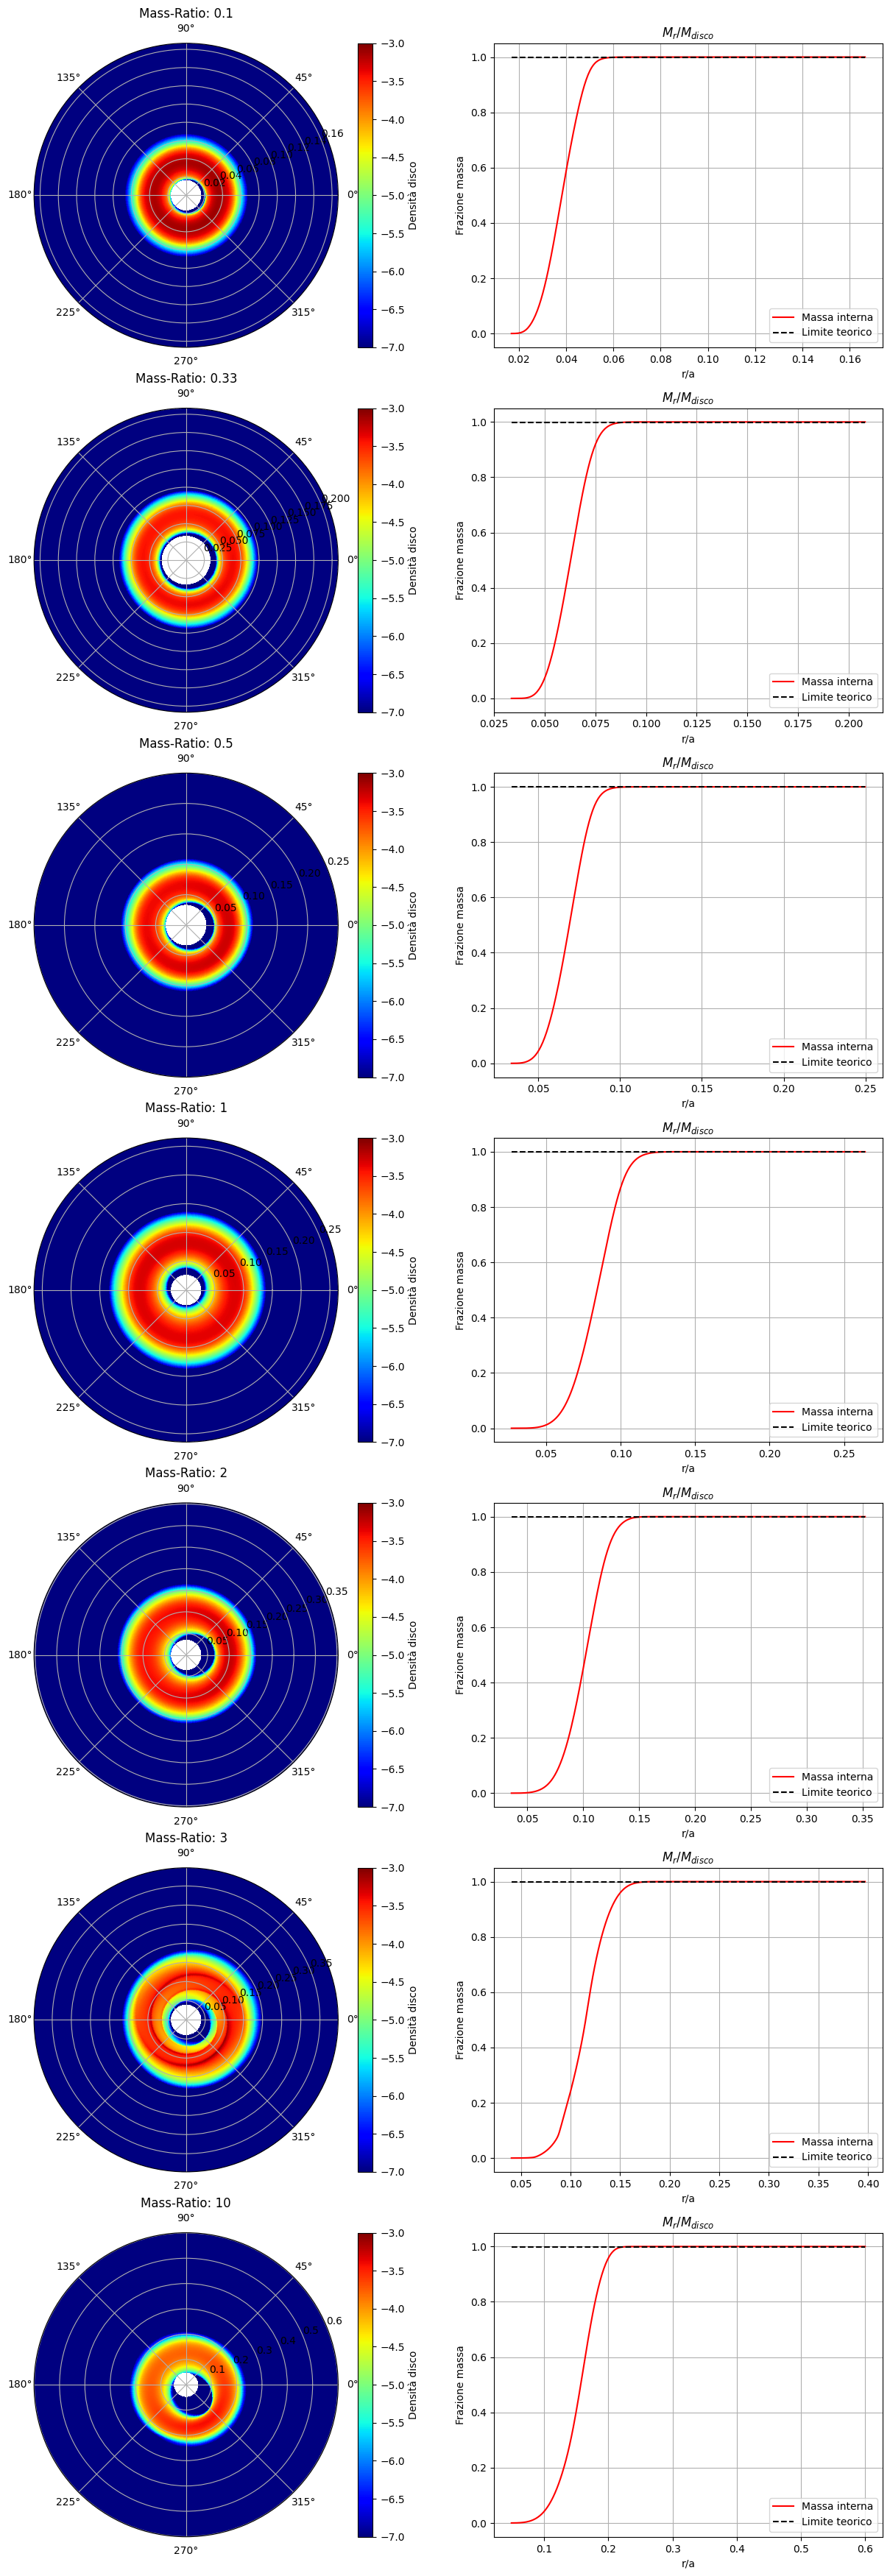

In [7]:
rmax = np.array([2.0, 2.5, 3.0, 4.0, 4.0, 4.0, 5.0])
rmin = np.array([0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])

# Creare una figura con più grafici polari
fig = plt.figure(figsize=(15, 44))
#Contenitore per la massa progressiva
m_prog = np.zeros((7, 384))

for i in range(0, 7):

    #Valori assunti dalla densità
    rho = np.fromfile("../Alpha-4/HighEcc/MR"+massr[i]+"/gasdens100.dat").reshape(384, 1152)

    for j in range(0, 2):

        #----------------------------------#
        #          Creo la griglia          #
        #-----------------------------------#

        # Creare una griglia di valori R e Theta
        theta = np.linspace(-np.pi, np.pi, 1152)
        #Creo coordinata radiale corretta
        r = np.linspace(rmin[i]/dist[i], rmax[i]/dist[i], 385)
        r_plot = np.zeros(384)
        for k in range(0, len(r_plot)):
            r_plot[k] = (r[k+1] - r[k])/2 + r[k]
        #Creo la griglia
        Theta, R = np.meshgrid(theta, r_plot)

        if (2*i + j)%2 == 0:
            ax = fig.add_subplot(7, 2, 2*i + j+1, projection='polar')
            #-----------------------------------#
            #      Disegno grafico polare       #
            #-----------------------------------#

            #Disegnare il grafico polare
            cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
            plt.colorbar(cax, label='Densità disco')
            ax.set_rmin(0)
            ax.set_rmax(rmax[i]/dist[i])
            ax.set_title(f'Mass-Ratio: ' + (massr[i]))

        else:
            ax = fig.add_subplot(7, 2, 2*i + j+1)
            raggio = 0

            #---------------------------------#
            #        Calcolo la massa         #
            #---------------------------------#
            for k in range(0,384):
                if k != 0:
                    m_prog[i, k] = m_prog[i, k-1]
                #Calcolo area della singola sezione
                area = np.pi * (pow(r[k+1],2)-pow(r[k],2))
                area = area/1152

                for h in range(0, 1152):
                    m_prog[i, k] += area * rho[k, h]
            
            ax.plot(r_plot, m_prog[i]/m_prog[i, 383], color = 'red', label = 'Massa interna')
            ax.plot(r_plot, m_prog[i]/m_prog[i] * 0.999, color = 'black', linestyle = '--', label = 'Limite teorico')
            ax.set_title(r'$M_r/M_{disco}$')
            ax.set_xlabel(r'r/a')
            ax.set_ylabel('Frazione massa')
            ax.legend(loc='best')
            ax.grid(True)
    
    

# Mostrare la figura con i grafici polari multipli
plt.show()

### Raggi

In [8]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([2.0, 2.5, 3.0, 4.0, 4.0, 4.0, 5.0])
rmin = np.array([0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
rag_A4_e6 = np.zeros(7)


for h in range(0, 7):
    rag = np.zeros(num[h])

    #Determino i raggi corretti
    r = np.linspace(rmin[h], rmax[h], 385)
    r_plot = np.zeros(384)
    for i in range(0, len(r_plot)):
        r_plot[i] = (r[i+1] - r[i])/2 + r[i]

    for k in range(0, num[h]):
        #Importo la densità considerata
        rho = np.fromfile("../Alpha-4/HighEcc/MR"+massr[h]+"/gasdens" + str(60+k) + ".dat").reshape(384, 1152)
        massa = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                massa += area * rho[i, j]

        #Controllo ora dove ottengo il 90% della massa
        appo = 0
        raggio = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                appo += area * rho[i, j]
    
            if appo >= par_rag*massa:
                rag[k] = r_plot[i]
                break

    med = 0
    for i in range(0, len(rag)):
        med += rag[i]

    rag_A4_e6[h] = round(med/len(rag)/dist[h], 3)
    print('Il raggio di troncamento del disco con Mass-ratio =  ' + massr[h] + ' è pari a: ' + str(round(med/len(rag)/dist[h], 3)) + ' a')

Il raggio di troncamento del disco con Mass-ratio =  0.1 è pari a: 0.06 a
Il raggio di troncamento del disco con Mass-ratio =  0.33 è pari a: 0.094 a
Il raggio di troncamento del disco con Mass-ratio =  0.5 è pari a: 0.105 a
Il raggio di troncamento del disco con Mass-ratio =  1 è pari a: 0.13 a
Il raggio di troncamento del disco con Mass-ratio =  2 è pari a: 0.155 a
Il raggio di troncamento del disco con Mass-ratio =  3 è pari a: 0.175 a
Il raggio di troncamento del disco con Mass-ratio =  10 è pari a: 0.227 a


<center>

# <span style="color:blue;"> Run Lunga </span>

<center>

### Output finale

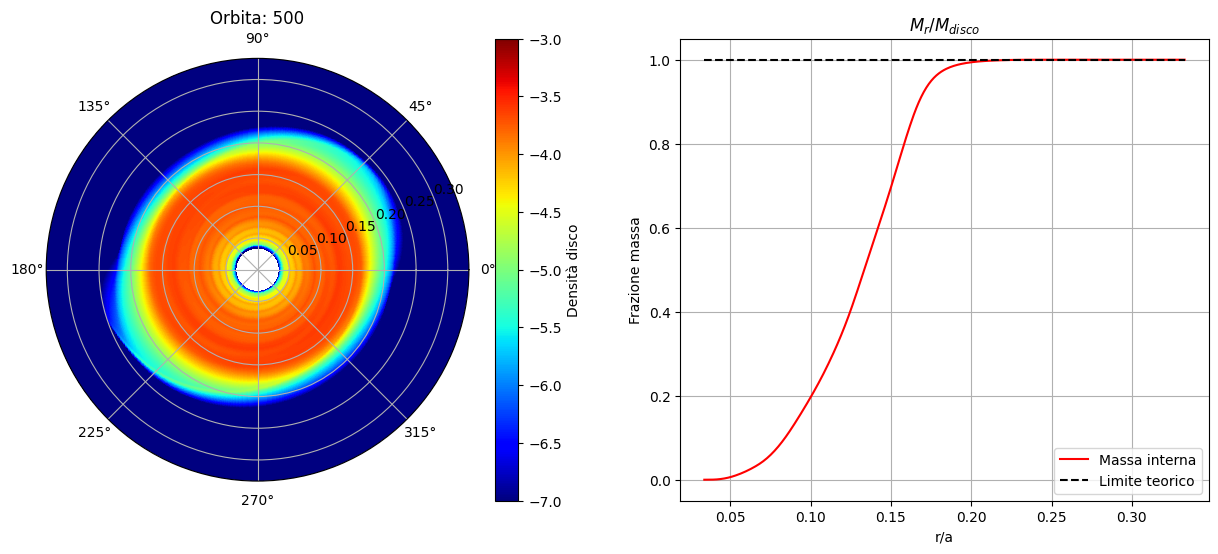

In [9]:
# Creare una figura con più grafici polari
fig = plt.figure(figsize=(15, 6))

rho = np.fromfile("../Alpha-4/Conv/RunLunga/gasdens200.dat").reshape(384, 1152)
ax = fig.add_subplot(1, 2, 1, projection='polar')

#----------------------------------#
#          Creo la griglia          #
#-----------------------------------#

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 1152)
#Creo coordinata radiale corretta
r = np.linspace(0.4/12, 4.0/12, 385)
r_plot = np.zeros(384)
for k in range(0, len(r_plot)):
    r_plot[k] = (r[k+1] - r[k])/2 + r[k]
#Creo la griglia
Theta, R = np.meshgrid(theta, r_plot)


#Disegnare il grafico polare
cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
plt.colorbar(cax, label='Densità disco')
ax.set_rmin(0)
ax.set_rmax(4.0/12)
ax.set_title(f'Orbita: 500')

#Creo massa in funzione della distanza
ax = fig.add_subplot(1, 2, 2)
raggio = 0; m_prog = np.zeros(384)

#---------------------------------#
#        Calcolo la massa         #
#---------------------------------#
for k in range(0,384):
    if k != 0:
        m_prog[k] = m_prog[k-1]
    #Calcolo area della singola sezione
    area = np.pi * (pow(r[k+1],2)-pow(r[k],2))
    area = area/1152

    for h in range(0, 1152):
        m_prog[k] += area * rho[k, h]
            
ax.plot(r_plot, m_prog/m_prog[383], color = 'red', label = 'Massa interna')
ax.plot(r_plot, m_prog/m_prog * 0.999, color = 'black', linestyle = '--', label = 'Limite teorico')
ax.set_title(r'$M_r/M_{disco}$')
ax.set_xlabel(r'r/a')
ax.set_ylabel('Frazione massa')
ax.legend(loc='best')
ax.grid(True)

plt.show()

### Andamento del raggio

In [22]:
rag = np.zeros(201)

#Creo i raggi corretti, ossia i centro zona dove è definita la densità
r = np.linspace(0.4, 4.0, 385)
r_plot = np.zeros(384)
for i in range(0, len(r_plot)):
    r_plot[i] = (r[i+1] - r[i])/2 + r[i]

for k in range(0, 201):
    #Importo la densità considerata
    rho = np.fromfile("../Alpha-4/Conv/RunLunga/gasdens" + str(k) + ".dat").reshape(384, 1152)
    massa = 0

    for i in range(0,384):
        #Calcolo area della singola sezione
        area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
        area = area/1152

        for j in range(0, 1152):
            massa += area * rho[i, j]

    #Controllo ora dove ottengo la percentuale richiesta di massa
    appo = 0

    for i in range(0,384):
        #Calcolo area della singola sezione
        area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
        area = area/1152

        for j in range(0, 1152):
            appo += area * rho[i, j]
    
        if appo >= 0.999*massa:
            rag[k] = r_plot[i]/12.0
            break


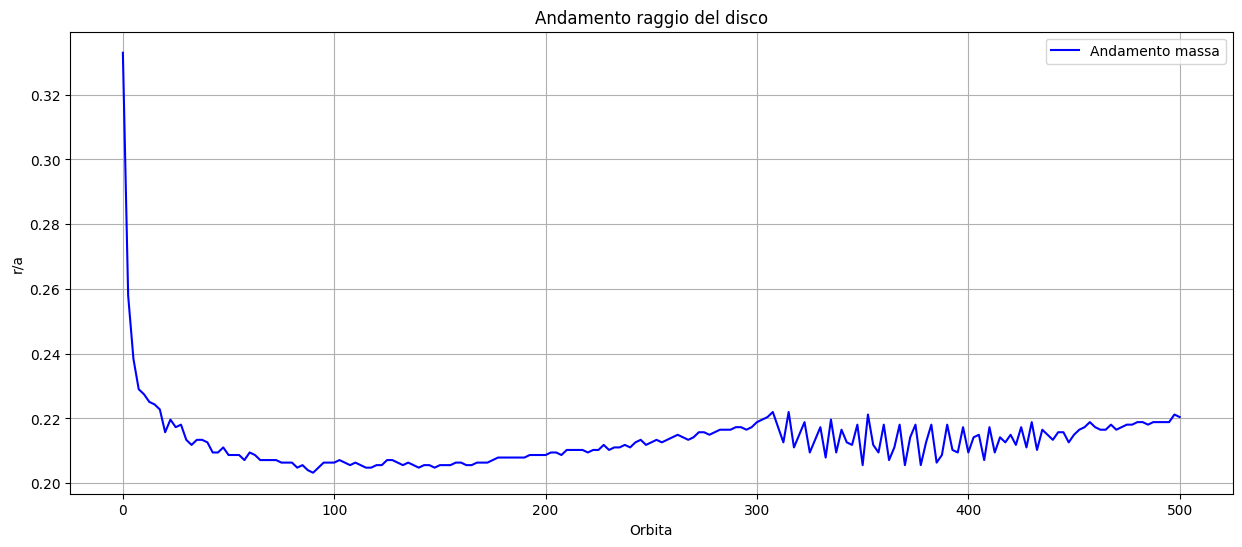

In [23]:
fig = plt.figure(figsize=(15, 6))

#Asse x grafici
x = np.zeros(201)
for i in range(0, len(x)):
    x[i] = i*2.5

#Grafico 1
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x, rag, color = 'blue', label = 'Andamento massa')
ax1.set_title('Andamento raggio del disco')
ax1.set_xlabel('Orbita')
ax1.set_ylabel('r/a')
ax1.grid(True)
ax1.legend()

plt.show()

### Differenza

In [25]:
print(rag[21])
print(rag[200])

0.20872395833333335
0.22044270833333335


<center>

# <span style="color:blue;"> Raggio minimo </span>

<center>

### Output finale

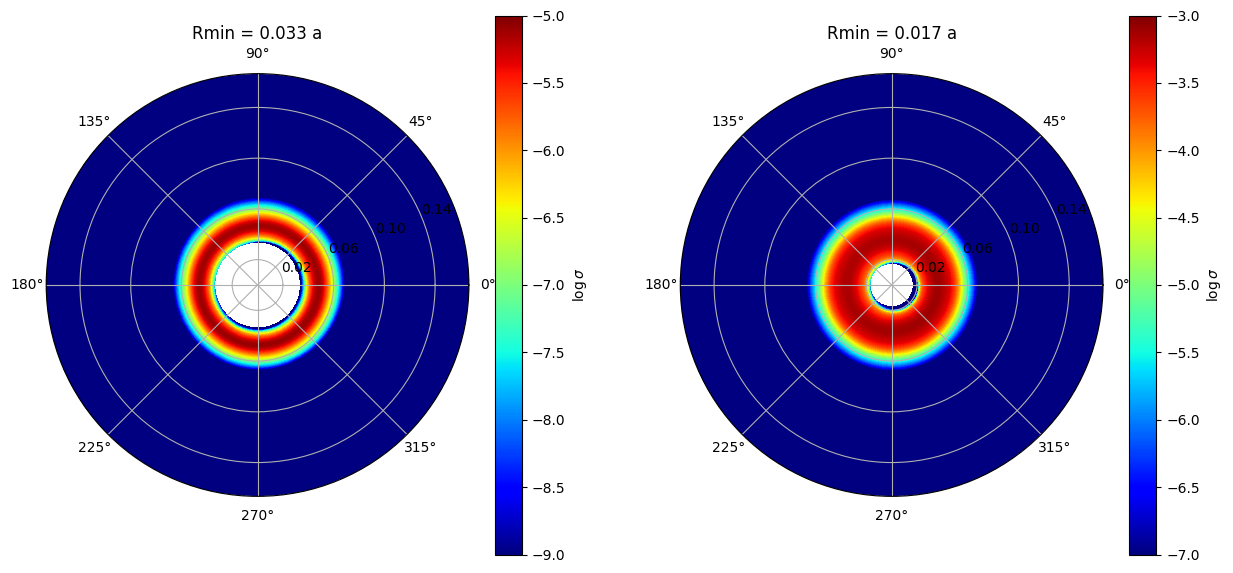

In [6]:
# Creare una figura con più grafici polari
fig, axs = plt.subplots(1, 2, figsize=(15, 7), subplot_kw={'projection': 'polar'})
rmin = np.array([0.4, 0.2])
max_min = np.array([-5, -9, -3, -7])

for i in range(0, 1):
    for j in range(0, 2):
        ax = axs[j]

        # Creare una griglia di valori R e Theta
        theta = np.linspace(-np.pi, np.pi, 1152)
        #Creo output radiale corretto
        r = np.linspace(rmin[j]/12, 2.0/12, 385)
        r_plot = np.zeros(384)
        for i in range(0, len(r_plot)):
            r_plot[i] = (r[i+1] - r[i])/2 + r[i]
        #Creo la griglia
        Theta, R = np.meshgrid(theta, r_plot)

        if j ==0: 
            #Valori assunti dalla funzione
            rho = np.fromfile("../Alpha-4/Conv/Rmin/gasdens100.dat").reshape(384, 1152)

        else:
            #Valori assunti dalla funzione
            rho = np.fromfile("../Alpha-4/HighEcc/MR0.1/gasdens100.dat").reshape(384, 1152)

        # Disegnare il grafico polare
        cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = max_min[2*j+1], vmax =  max_min[2*j])
        plt.colorbar(cax, label=r'$\log{\sigma}$')
        ax.set_rmin(0)
        ax.set_rmax(2.0/12)
        ax.set_title("Rmin = " + str(round(rmin[j]/12, 3)) + ' a')    

        #Imposto scala raggi
        scala_raggi_desiderati = [0.02, 0.06, 0.10, 0.14]
        ax.set_yticks(scala_raggi_desiderati)
    

# Mostrare la figura con i grafici polari multipli
plt.show()

### Confronto fra raggi

In [13]:
titolo = np.array(["Rmin = 0.4", "Rmin = 0.2"])

num = np.array([41, 41])
rmax = np.array([2.0, 2.0])
rmin = np.array([0.4, 0.2])
dist = np.array([12, 12])

for h in range(0, 2):

    rag = np.zeros(num[h])

    #Creo bordi della griglia
    r = np.linspace(rmin[h], rmax[h], 385)
    r_plot = np.zeros(384)
    for i in range(0, len(r_plot)):
        r_plot[i] = (r[i+1] - r[i])/2 + r[i]

    for k in range(0, num[h]):

        if h == 0:
            rho = np.fromfile("../Alpha-4/Conv/Rmin/gasdens" + str(60+k) + ".dat").reshape(384, 1152)

        else:
            rho = np.fromfile("../Alpha-4/HighEcc/MR0.1/gasdens" + str(60+k) + ".dat").reshape(384, 1152)

        massa = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                massa += area * rho[i, j]

        #Controllo ora dove ottengo il 90% della massa
        appo = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152 

            for j in range(0, 1152):
                appo += area * rho[i, j]
    
            if appo >= par_rag*massa:
                rag[k] = r_plot[i]
                break

    med = 0
    for i in range(0, len(rag)):
        med += rag[i]

    print('Il raggio di troncamento del disco con: ' + titolo[h] +' pari a: ' + str(round(med/len(rag)/dist[h], 3)) + ' a')

Il raggio di troncamento del disco con: Rmin = 0.4 pari a: 0.064 a
Il raggio di troncamento del disco con: Rmin = 0.2 pari a: 0.06 a


<center>

# <span style="color:blue;"> Alta definizione </span>

<center>

### Output finale

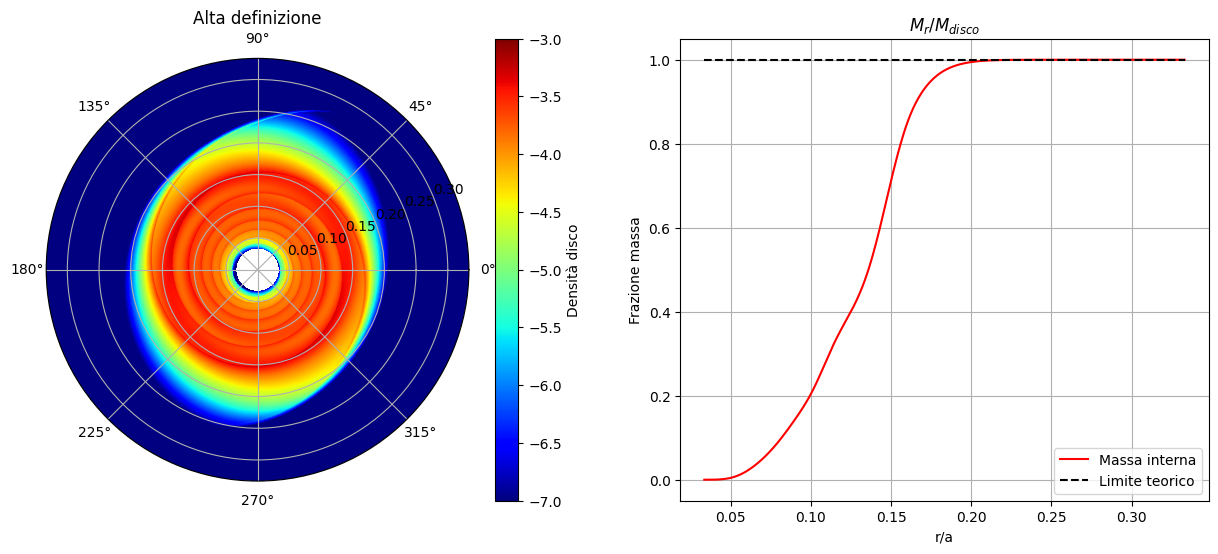

In [14]:
# Creare una figura con più grafici polari
fig = plt.figure(figsize=(15, 6))

rho = np.fromfile("../Alpha-4/Conv/AltaDef/gasdens100.dat").reshape(768, 2304)
ax = fig.add_subplot(1, 2, 1, projection='polar')

#----------------------------------#
#          Creo la griglia          #
#-----------------------------------#

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 2304)
#Creo coordinata radiale corretta
r = np.linspace(0.4/12, 4.0/12, 769)
r_plot = np.zeros(768)
for k in range(0, len(r_plot)):
    r_plot[k] = (r[k+1] - r[k])/2 + r[k]
#Creo la griglia
Theta, R = np.meshgrid(theta, r_plot)


#Disegnare il grafico polare
cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
plt.colorbar(cax, label='Densità disco')
ax.set_rmin(0)
ax.set_rmax(4.0/12)
ax.set_title(f'Alta definizione')

#Creo massa in funzione della distanza
ax = fig.add_subplot(1, 2, 2)
raggio = 0; m_prog = np.zeros(768)

#---------------------------------#
#        Calcolo la massa         #
#---------------------------------#
for k in range(0,768):
    if k != 0:
        m_prog[k] = m_prog[k-1]
    #Calcolo area della singola sezione
    area = np.pi * (pow(r[k+1],2)-pow(r[k],2))
    area = area/2304

    for h in range(0, 2304):
        m_prog[k] += area * rho[k, h]
            
ax.plot(r_plot, m_prog/m_prog[767], color = 'red', label = 'Massa interna')
ax.plot(r_plot, m_prog/m_prog * 0.999, color = 'black', linestyle = '--', label = 'Limite teorico')
ax.set_title(r'$M_r/M_{disco}$')
ax.set_xlabel(r'r/a')
ax.set_ylabel('Frazione massa')
ax.legend(loc='best')
ax.grid(True)

plt.show()

### Differenza fra raggi

In [15]:
titolo = np.array(["definizione normale", "alta definizione"])

num = np.array([41, 41])
rmax = np.array([4.0, 4.0])
rmin = np.array([0.4, 0.4])
dist = np.array([12, 12])
inte = np.array([1152, 384, 2304, 768])

for h in range(0, 2):

    rag = np.zeros(num[h])

    r = np.linspace(rmin[h], rmax[h], (inte[2*h+1]+1))
    r_plot = np.zeros(inte[2*h+1])
    for i in range(0, len(r_plot)):
        r_plot[i] = (r[i+1] - r[i])/2 + r[i]

    for k in range(0, num[h]):

        if h == 1:
            rho = np.fromfile("../Alpha-4/Conv/AltaDef/gasdens" + str(60+k) + ".dat").reshape(inte[2*h+1], inte[2*h])

        else:
            rho = np.fromfile("../Alpha-4/NoEcc/MR0.33/gasdens" + str(60+k) + ".dat").reshape(inte[2*h+1], inte[2*h])

        massa = 0
        

        for i in range(0,inte[2*h+1]):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/inte[2*h]

            for j in range(0, inte[2*h]):
                massa += area * rho[i, j]

        #Controllo ora dove ottengo il 90% della massa
        appo = 0

        for i in range(0,inte[2*h+1]):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/inte[2*h]

            for j in range(0, inte[2*h]):
                appo += area * rho[i, j]
    
            if appo >= par_rag*massa:
                rag[k] = r_plot[i]
                break

    med = 0
    for i in range(0, len(rag)):
        med += rag[i]

    print('Il raggio di troncamento del disco con ' + titolo[h] +' è pari a: ' + str(round(med/len(rag)/dist[h], 3)) + ' a')

Il raggio di troncamento del disco con definizione normale è pari a: 0.212 a
Il raggio di troncamento del disco con alta definizione è pari a: 0.22 a


<center>

# <span style="color:blue;"> Presentazione dei risultati </span>

<center>

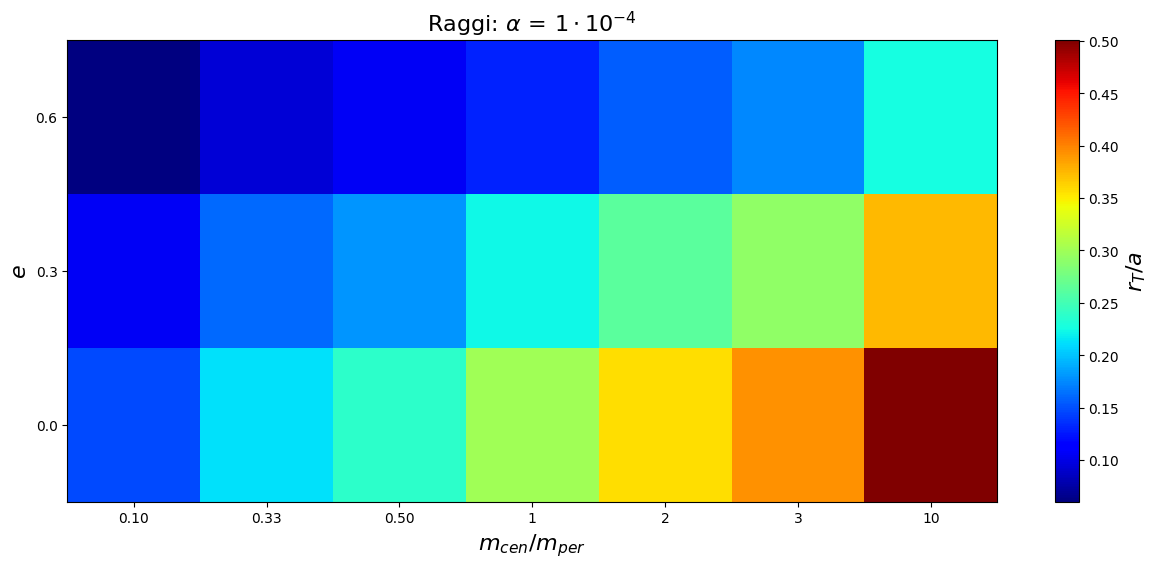

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

# Crea una griglia di valori mass ratios ed eccetricità
mr = np.array([1, 3, 5, 7, 9, 11, 13])
ecc = np.array([1, 3, 5])
mr, ecc = np.meshgrid(mr, ecc)

#Riempio i vari raggi del disco
r_disco = np.zeros((3,7))
for i in range(0,3):
    for j in range(0, 7):

        if i==0:
            r_disco[i, j] = rag_A4_e0[j]
        elif i==1:
            r_disco[i, j] = rag_A4_e3[j]
        elif i==2:
            r_disco[i, j] = rag_A4_e6[j]

#r_disco = np.array([[0.147, 0.212, 0.239, 0.300, 0.357, 0.394, 0.501], [0.105, 0.160, 0.179, 0.222, 0.262, 0.291, 0.374], [0.060, 0.094, 0.105, 0.130, 0.155, 0.175, 0.227]])

# Disegnare il color-plot
cax = ax.pcolormesh(mr, ecc, r_disco, cmap='jet', vmin = np.min(r_disco), vmax =np.max(r_disco))
cb = plt.colorbar(cax, label=r'$r_T/a$')
cb.set_label(label=r'$r_T/a$', fontsize = 16)
ax.set_xlabel(r"$m_{cen}/m_{per}$", fontsize = 16)
ax.set_ylabel(r"$e$", fontsize = 16)
ax.set_title(r"Raggi: $\alpha\,=\,1 \cdot 10^{-4}$", fontsize = 16)

ax.set_xticks(mr[0])
ax.set_yticks([1, 3, 5])

ax.set_yticklabels(['0.0', '0.3', '0.6'])
ax.set_xticklabels(['0.10', '0.33', '0.50', '1', '2', '3', '10'])

plt.show()

<center>

# <span style="color:blue;"> Confronto con i risultati teorici </span>

<center>

Per determinare il raggio di troncamento teorico lavoro con:
$$ R_t\,=\,R_{Egg}\left(\alpha e^{\beta}\,+\,\gamma \mu^{\delta}\right)$$
dove:
$$ R_{Egg}\,=\,\frac{0.49 q^{2/3}}{0.6 q^{2/3}\,+\,\ln(1\,+\,q^{1/3})} $$

In [17]:
mu = np.array([1.0/11.0, 1.0/4.0, 1.0/3.0, 1.0/2.0, 1.0/1.5, 3.0/4.0, 1.0/1.1])
mr = np.array([0.1, 0.33, 0.5, 1.0, 2.0, 3.0, 10.0])

gamma = 0.88
delta = 0.01

y_ecc = np.array([0.0, 0.3, 0.6])

alfa = - np.array([0.820, 0.830, 0.820, 0.820, 0.813, 0.805, 0.782])
beta = np.array([0.689, 0.695, 0.687, 0.660, 0.640, 0.615, 0.556])

#Raggi Eggleton
rag_egg = np.zeros(len(mr))
for i in range(0, len(rag_egg)):
    rag_egg[i] = (0.49 * pow(mr[i], 2.0/3.0))/(0.6 * pow(mr[i], 2.0/3.0) + math.log(1 + pow(mr[i], 1.0/3.0)))

rag_tr = np.zeros((len(y_ecc), len(mu)))

for i in range(0, len(y_ecc)):
    for j in range(0, len(mu)):
        rag_tr[i, j] = rag_egg[j] * (alfa[j] * pow(y_ecc[i], beta[j]) + gamma * pow(mu[j], delta))

print(rag_tr)

[[0.17764886 0.25013911 0.27920921 0.33114675 0.38563693 0.41773383
  0.50830379]
 [0.10368082 0.14653025 0.16417833 0.19078072 0.22009615 0.23496934
  0.27680924]
 [0.05840013 0.08240834 0.09401729 0.10935683 0.1276699  0.13781942
  0.16796343]]


In [18]:
mu = np.array([1.0/11.0, 1.0/4.0, 1.0/3.0, 1.0/2.0, 1.0/1.5, 3.0/4.0, 1.0/1.1])
mr = np.array([0.1, 0.33, 0.5, 1.0, 2.0, 3.0, 10.0])

gamma = 0.88
delta = 0.01

y_ecc = np.array([0.0, 0.3, 0.6])

#Interpolato su Reynholds
alfa = - np.array([0.900, 0.863, 0.863, 0.853, 0.846, 0.855, 0.881])
beta = np.array([0.325, 0.295, 0.287, 0.260, 0.240, 0.215, 0.156])

#Raggi Eggleton
rag_egg = np.zeros(len(mr))
for i in range(0, len(rag_egg)):
    rag_egg[i] = (0.49 * pow(mr[i], 2.0/3.0))/(0.6 * pow(mr[i], 2.0/3.0) + math.log(1 + pow(mr[i], 1.0/3.0)))

rag_tr_int = np.zeros((len(y_ecc), len(mu)))

for i in range(0, len(y_ecc)):
    for j in range(0, len(mu)):
        rag_tr_int[i, j] = rag_egg[j] * (alfa[j] * pow(y_ecc[i], beta[j]) + gamma * pow(mu[j], delta))

### Eccentricità fissata

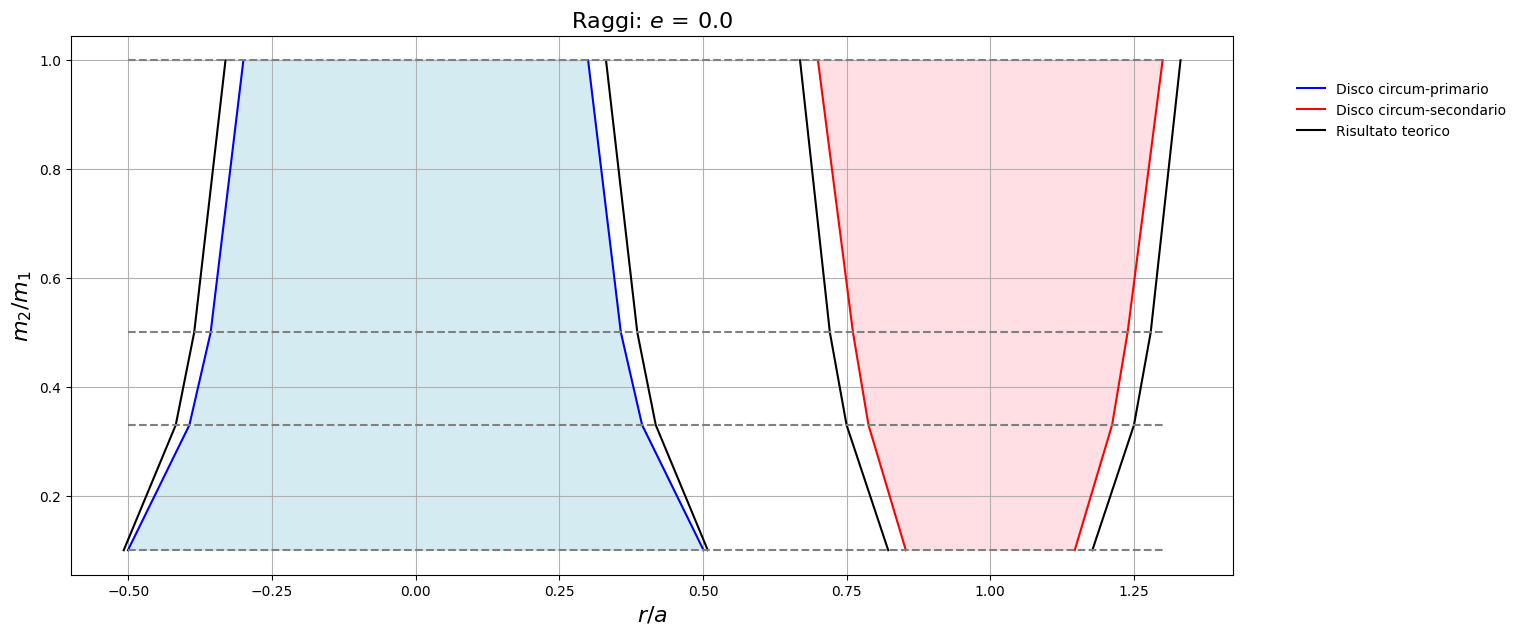

In [19]:
fig = plt.figure(figsize=(15, 7))

mass_ratio = np.array([0.1, 0.33, 0.5, 1])
x = np.zeros(4)
x_teo = np.zeros(4)
x_teo_int = np.zeros(4)

for i in range(0, len(mass_ratio)):
    if i<2: 
        if i==0:
            for j in range(0, len(mass_ratio)):
                x[j] = -rag_A4_e0[6-j]
                x_teo[j] = -rag_tr[0, 6-j]
                x_teo_int[j] = -rag_tr_int[0, 6-j]

            plt.plot(x, mass_ratio, color = 'blue', label = 'Disco circum-primario')
            plt.plot(x_teo, mass_ratio, color = 'black')
            #plt.plot(x_teo_int, mass_ratio, color = 'green')

        else:
            for j in range(0, len(mass_ratio)):
                x[j] = rag_A4_e0[6-j]
                x_teo[j] = rag_tr[0, 6-j]
                x_teo_int[j] = rag_tr_int[0, 6-j]

            plt.plot(x, mass_ratio, color = 'blue')
            plt.plot(x_teo, mass_ratio, color = 'black')
            #plt.plot(x_teo_int, mass_ratio, color = 'green')


    
    else:
        if i==2:
            for j in range(0, len(mass_ratio)):
                x[j] = 1-rag_A4_e0[j]
                x_teo[j] = 1-rag_tr[0, j]
                x_teo_int[j] = 1-rag_tr_int[0, j]

            plt.plot(x, mass_ratio, color = 'red', label = 'Disco circum-secondario')
            plt.plot(x_teo, mass_ratio, color = 'black')
            #plt.plot(x_teo_int, mass_ratio, color = 'green')

        else:
            for j in range(0, len(mass_ratio)):
                x[j] = 1+rag_A4_e0[j]
                x_teo[j] = 1+rag_tr[0, j]
                x_teo_int[j] = 1+rag_tr_int[0, j]

            plt.plot(x, mass_ratio, color = 'red')
            plt.plot(x_teo, mass_ratio, color = 'black', label = 'Risultato teorico')
            #plt.plot(x_teo_int, mass_ratio, color = 'green', label = 'Risultato teorico: interpolazione')


for i in range(0, len(mass_ratio)):
    x = np.array([-rag_A4_e0[6], 1+rag_A4_e0[3]])
    y = np.array([mass_ratio[i], mass_ratio[i]])

    plt.plot(x, y, color = 'grey', linestyle = '--')
    

#Riempio le regioni da colorare
#Devo prima di tutto specificare quali siano i bordi della figura

#Regione disco circum-primario
x_fill = np.zeros(9)
y_fill = np.zeros(9)

for i in range(0, len(x_fill)-1):
    if i<len(mass_ratio):
        x_fill[i] = -rag_A4_e0[6-i]
    else:
        x_fill[i] = rag_A4_e0[i-1]

x_fill[8] = -rag_A4_e0[6]
y_fill = np.concatenate((mass_ratio, mass_ratio[::-1], np.array([0.1])))
plt.fill(x_fill, y_fill, color='lightblue', alpha=0.5)


#Regione disco circum-secondario
for i in range(0, len(x_fill)-1):
    if i<len(mass_ratio):
        x_fill[i] = 1-rag_A4_e0[i]
    else:
        x_fill[i] = 1+rag_A4_e0[6+1-i]

x_fill[8] = 1-rag_A4_e0[0]
y_fill = np.concatenate((mass_ratio, mass_ratio[::-1], np.array([0.1])))
plt.fill(x_fill, y_fill, color='pink', alpha=0.5)



plt.title(r'Raggi: $e\,=\,0.0$', fontsize = 16)
plt.ylabel(r'$m_2/m_1$', fontsize = 16)
plt.xlabel(r'$r/a$', fontsize = 16)
plt.legend(loc=(1.05, 0.8), frameon=False)
plt.grid(True)
plt.show()

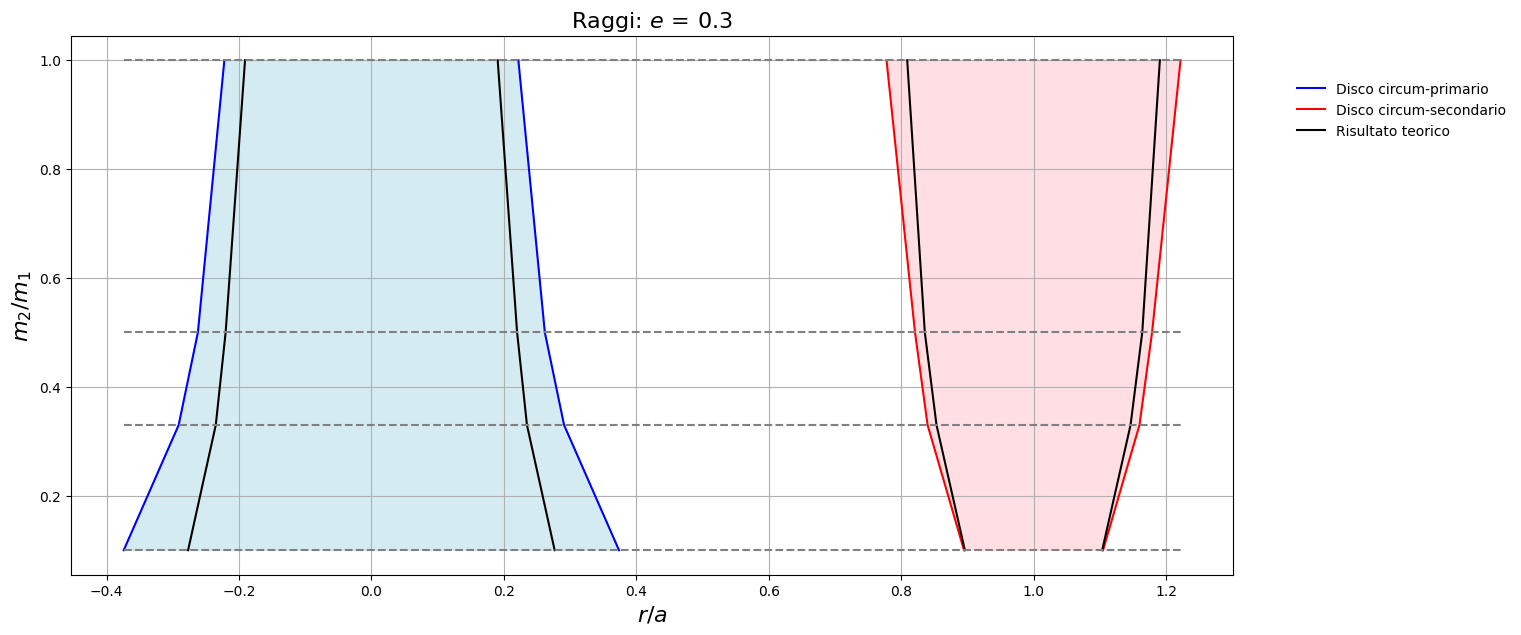

In [20]:
fig = plt.figure(figsize=(15, 7))

mass_ratio = np.array([0.1, 0.33, 0.5, 1])
x = np.zeros(4)
x_teo = np.zeros(4)
x_teo_int = np.zeros(4)

for i in range(0, len(mass_ratio)):
    if i<2: 
        if i==0:
            for j in range(0, len(mass_ratio)):
                x[j] = -rag_A4_e3[6-j]
                x_teo[j] = -rag_tr[1, 6-j]
                x_teo_int[j] = -rag_tr_int[1, 6-j]

            plt.plot(x, mass_ratio, color = 'blue', label = 'Disco circum-primario')
            plt.plot(x_teo, mass_ratio, color = 'black')
            #plt.plot(x_teo_int, mass_ratio, color = 'green')

        else:
            for j in range(0, len(mass_ratio)):
                x[j] = rag_A4_e3[6-j]
                x_teo[j] = rag_tr[1, 6-j]
                x_teo_int[j] = rag_tr_int[1, 6-j]

            plt.plot(x, mass_ratio, color = 'blue')
            plt.plot(x_teo, mass_ratio, color = 'black')
            #plt.plot(x_teo_int, mass_ratio, color = 'green')

    
    else:
        if i==2:
            for j in range(0, len(mass_ratio)):
                x[j] = 1-rag_A4_e3[j]
                x_teo[j] = 1-rag_tr[1, j]
                x_teo_int[j] = 1-rag_tr_int[1, j]

            plt.plot(x, mass_ratio, color = 'red', label = 'Disco circum-secondario')
            plt.plot(x_teo, mass_ratio, color = 'black')
            #plt.plot(x_teo_int, mass_ratio, color = 'green')

        else:
            for j in range(0, len(mass_ratio)):
                x[j] = 1+rag_A4_e3[j]
                x_teo[j] = 1+rag_tr[1, j]
                x_teo_int[j] = 1+rag_tr_int[1, j]

            plt.plot(x, mass_ratio, color = 'red')
            plt.plot(x_teo, mass_ratio, color = 'black', label = 'Risultato teorico')
            #plt.plot(x_teo_int, mass_ratio, color = 'green', label = 'Risultato teorico: interpolato')


for i in range(0, len(mass_ratio)):
    x = np.array([-rag_A4_e3[6], 1+rag_A4_e3[3]])
    y = np.array([mass_ratio[i], mass_ratio[i]])

    plt.plot(x, y, color = 'grey', linestyle = '--')
    

#Riempio le regioni da colorare
#Devo prima di tutto specificare quali siano i bordi della figura

#Regione disco circum-primario
x_fill = np.zeros(9)
y_fill = np.zeros(9)

for i in range(0, len(x_fill)-1):
    if i<len(mass_ratio):
        x_fill[i] = -rag_A4_e3[6-i]
    else:
        x_fill[i] = rag_A4_e3[i-1]

x_fill[8] = -rag_A4_e3[6]
y_fill = np.concatenate((mass_ratio, mass_ratio[::-1], np.array([0.1])))
plt.fill(x_fill, y_fill, color='lightblue', alpha=0.5)


#Regione disco circum-secondario
for i in range(0, len(x_fill)-1):
    if i<len(mass_ratio):
        x_fill[i] = 1-rag_A4_e3[i]
    else:
        x_fill[i] = 1+rag_A4_e3[6+1-i]

x_fill[8] = 1-rag_A4_e3[0]
y_fill = np.concatenate((mass_ratio, mass_ratio[::-1], np.array([0.1])))
plt.fill(x_fill, y_fill, color='pink', alpha=0.5)



plt.title(r'Raggi: $e\,=\,0.3$', fontsize = 16)
plt.ylabel(r'$m_2/m_1$', fontsize = 16)
plt.xlabel(r'$r/a$', fontsize = 16)
plt.legend(loc=(1.05, 0.8), frameon=False)
plt.grid(True)
plt.show()

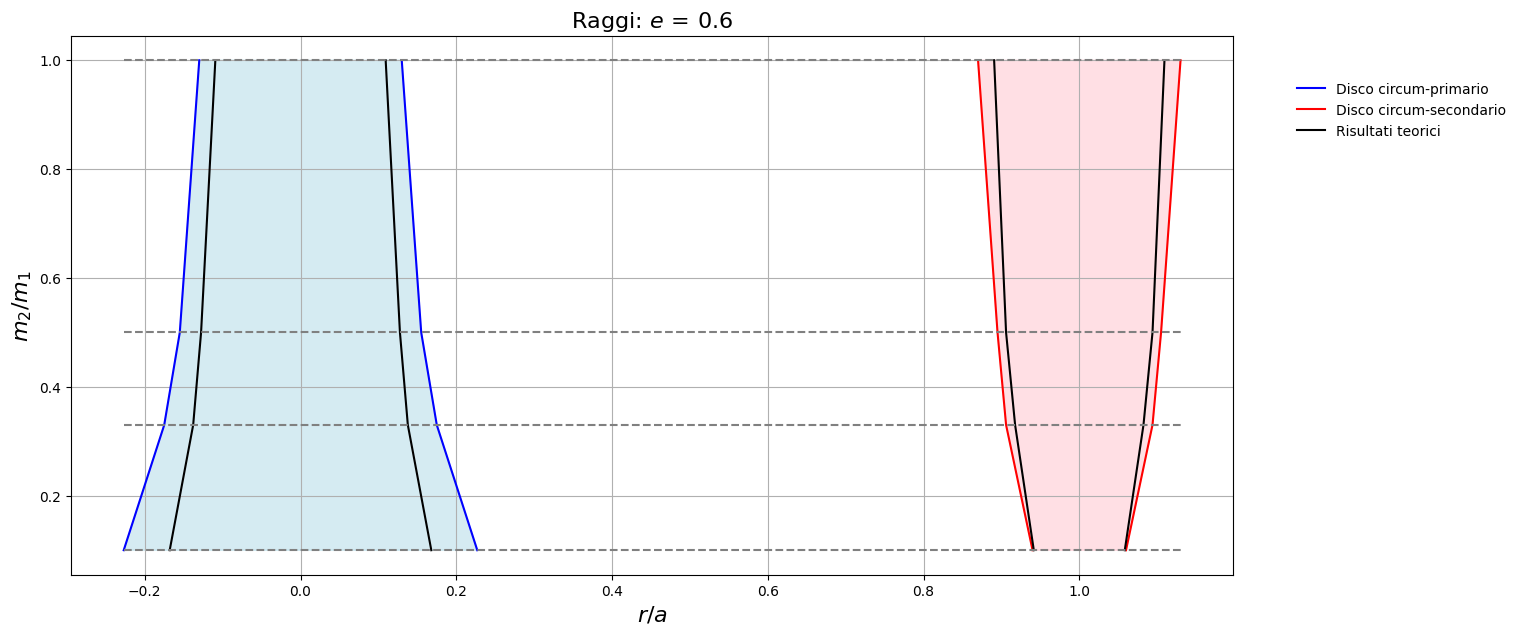

In [21]:
fig = plt.figure(figsize=(15, 7))

mass_ratio = np.array([0.1, 0.33, 0.5, 1])
x = np.zeros(4)
x_teo = np.zeros(4)
x_teo_int = np.zeros(4)

for i in range(0, len(mass_ratio)):
    if i<2: 
        if i==0:
            for j in range(0, len(mass_ratio)):
                x[j] = -rag_A4_e6[6-j]
                x_teo[j] = -rag_tr[2, 6-j]
                x_teo_int[j] = -rag_tr_int[2, 6-j]

            plt.plot(x, mass_ratio, color = 'blue', label = 'Disco circum-primario')
            plt.plot(x_teo, mass_ratio, color = 'black')
            #plt.plot(x_teo_int, mass_ratio, color = 'green')

        else:
            for j in range(0, len(mass_ratio)):
                x[j] = rag_A4_e6[6-j]
                x_teo[j] = rag_tr[2, 6-j]
                x_teo_int[j] = rag_tr_int[2, 6-j]

            plt.plot(x, mass_ratio, color = 'blue')
            plt.plot(x_teo, mass_ratio, color = 'black')
            #plt.plot(x_teo_int, mass_ratio, color = 'green')

    
    else:
        if i==2:
            for j in range(0, len(mass_ratio)):
                x[j] = 1-rag_A4_e6[j]
                x_teo[j] = 1-rag_tr[2, j]
                x_teo_int[j] = 1-rag_tr_int[2, j]

            plt.plot(x, mass_ratio, color = 'red', label = 'Disco circum-secondario')
            plt.plot(x_teo, mass_ratio, color = 'black')
            #plt.plot(x_teo_int, mass_ratio, color = 'green')

        else:
            for j in range(0, len(mass_ratio)):
                x[j] = 1+rag_A4_e6[j]
                x_teo[j] = 1+rag_tr[2, j]
                x_teo_int[j] = 1+rag_tr_int[2, j]

            plt.plot(x, mass_ratio, color = 'red')
            plt.plot(x_teo, mass_ratio, color = 'black', label = 'Risultati teorici')
            #plt.plot(x_teo_int, mass_ratio, color =  'green', label = 'Risultati teorici: interpolato')


for i in range(0, len(mass_ratio)):
    x = np.array([-rag_A4_e6[6], 1+rag_A4_e6[3]])
    y = np.array([mass_ratio[i], mass_ratio[i]])

    plt.plot(x, y, color = 'grey', linestyle = '--')
    

#Riempio le regioni da colorare
#Devo prima di tutto specificare quali siano i bordi della figura

#Regione disco circum-primario
x_fill = np.zeros(9)
y_fill = np.zeros(9)

for i in range(0, len(x_fill)-1):
    if i<len(mass_ratio):
        x_fill[i] = -rag_A4_e6[6-i]
    else:
        x_fill[i] = rag_A4_e6[i-1]

x_fill[8] = -rag_A4_e6[6]
y_fill = np.concatenate((mass_ratio, mass_ratio[::-1], np.array([0.1])))
plt.fill(x_fill, y_fill, color='lightblue', alpha=0.5)


#Regione disco circum-secondario
for i in range(0, len(x_fill)-1):
    if i<len(mass_ratio):
        x_fill[i] = 1-rag_A4_e6[i]
    else:
        x_fill[i] = 1+rag_A4_e6[6+1-i]

x_fill[8] = 1-rag_A4_e6[0]
y_fill = np.concatenate((mass_ratio, mass_ratio[::-1], np.array([0.1])))
plt.fill(x_fill, y_fill, color='pink', alpha=0.5)



plt.title(r'Raggi: $e\,=\,0.6$', fontsize = 16)
plt.ylabel(r'$m_2/m_1$', fontsize = 16)
plt.xlabel(r'$r/a$', fontsize = 16)
plt.legend(loc=(1.05, 0.8), frameon=False)
plt.grid(True)
plt.show()